## Occupational Entailment Delta by Gender

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def process_occ_entail(path):
    with open(path, 'r') as file:
        data = [line.strip().split(',') for line in file]

    baseline = {}
    i = 0
    for d in data:
        f = float(d[-1])
        m = float(d[-2])
        names = d[:-2]
        occ = ' '.join([n.replace('[', '').replace("'", '').replace(']', '') for n in names])
        if occ not in baseline:
            baseline[occ] = {'m': [], 'f': []}
        baseline[occ]['m'].append(m)
        baseline[occ]['f'].append(f)
        baseline[occ]['occ_list'] = occ.split(' ')

    for key in baseline.keys():
        bkm = baseline[key]['m']
        bkf = baseline[key]['f']
        m_mean = sum(bkm) / len(bkm)
        f_mean = sum(bkf) / len(bkf)
        m_mad = np.mean([abs(prob - 1/3) for prob in bkm]) # mad within the male probs
        f_mad = np.mean([abs(prob - 1/3) for prob in bkf]) # mad within the female probs
        mf_mad = np.mean(abs(np.array(bkm) - np.array(bkf))) # mad from male to female
        baseline[key]['m_mad'] = m_mad
        baseline[key]['f_mad'] = f_mad
        baseline[key]['mf_mad'] = mf_mad
        baseline[key]['mean_f'] = np.mean(np.array(bkf)) # mean of female probs
        baseline[key]['mean_m'] = np.mean(np.array(bkm)) # mean of male probs

    # get some (occ, val) tuples to sort
    m_mads = [(k, baseline[k]['m_mad']) for k in baseline.keys()]
    f_mads = [(k, baseline[k]['f_mad']) for k in baseline.keys()]
    all_mf_mad = [(k, baseline[k]['mf_mad']) for k in baseline.keys()]
    all_mean_f = [(k, baseline[k]['mean_f']) for k in baseline.keys()]
    all_mean_m = [(k, baseline[k]['mean_m']) for k in baseline.keys()]

    sorted_m_mads, madsm= zip(*sorted(m_mads, key=lambda x: x[1], reverse=True)) # sorted mean among male by occupation
    sorted_f_mads, madsf = zip(*sorted(f_mads, key=lambda x: x[1], reverse=True)) # sorted mean among female by occupation
    occupsall, madsall = zip(*sorted(all_mf_mad, key=lambda x: x[1], reverse=True)) # sorted mean between m and f
    sorted_mean_f, meansf = zip(*sorted(all_mean_f, key=lambda x: x[1], reverse=True)) # sorted mean among occupations - female
    sorted_mean_m, meansm = zip(*sorted(all_mean_m, key=lambda x: x[1], reverse=True)) # sorted mean among occupations - male

    # plot opt 1
    m_values = [o['mean_m'] for o in baseline.values()]
    f_values = [o['mean_f'] for o in baseline.values()]

    # plot opt 2
    m_mad_vals = [o['m_mad'] for o in baseline.values()]
    f_mad_vals = [o['f_mad'] for o in baseline.values()]

    return m_values, f_values, baseline.keys(), sorted_mean_m, sorted_mean_f, baseline, m_mad_vals, f_mad_vals

def plot_occupation_bias(m_values, f_values, keys, sorted_mean_m, sorted_mean_f, title, mad=False):
    plt.scatter(m_values, f_values, s=5)
    if mad:
        plt.xlabel('MAD from 1/3 - male')
        plt.ylabel('MAD from 1/3 - female')
        plt.title(title + ' mean absolute difference\n by gender and occupation')
    else:
        plt.xlabel('Mean entail probability - male')
        plt.ylabel('Mean entail probability - female')
        plt.title(title + ' mean entailment scores\n by gender and occupation')

    # annotate top 5 points - you should make it same set as baseline
    for i, (k, x, y) in enumerate(zip(keys, m_values, f_values)):
        if k in sorted_mean_m[0:5] or k in sorted_mean_f[0:5]:
            plt.annotate(k, (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='red')

    plt.show()
    print(f'{title} \nTop 10 female entailed occupations: {sorted_mean_f[0:5]}')
    print(f'\nTop 10 male entailed occupations: {sorted_mean_m[0:5]}')

### Mean entailment scores by gender and occupation

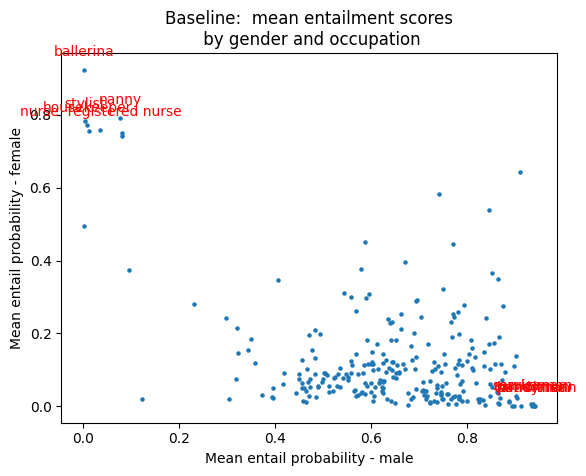

Baseline:  
Top 10 female entailed occupations: ('ballerina', 'nanny', 'stylist', 'housekeeper', 'nurse  registered nurse')

Top 10 male entailed occupations: ('cameraman', 'handyman', 'serviceman', 'patrolman', 'marksman')


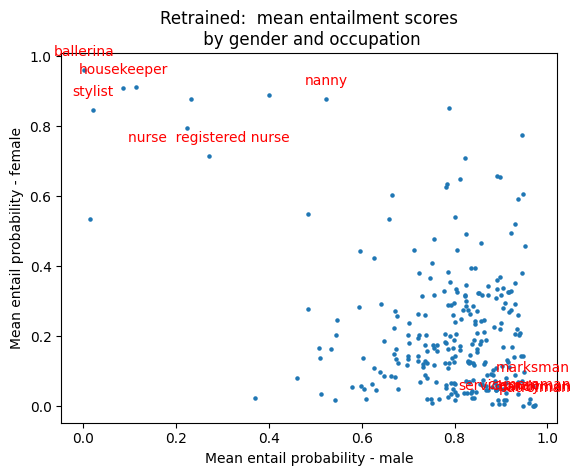

Retrained:  
Top 10 female entailed occupations: ('ballerina', 'nanny', 'stylist', 'housekeeper', 'nurse  registered nurse')

Top 10 male entailed occupations: ('cameraman', 'handyman', 'serviceman', 'patrolman', 'marksman')


In [29]:
b_m_values, b_f_values, keys, b_sorted_mean_m, b_sorted_mean_f, baseline, m_mad_vals, f_mad_vals = process_occ_entail('/content/baseline_prob_diff')
plot_occupation_bias(b_m_values, b_f_values, keys, b_sorted_mean_m, b_sorted_mean_f, 'Baseline: ')

m_values, f_values, keys, sorted_mean_f, sorted_mean_m, baseline, m_mad_vals, f_mad_vals = process_occ_entail('/content/trained_prob_diff')
plot_occupation_bias(m_values, f_values, keys, b_sorted_mean_m, b_sorted_mean_f, 'Retrained: ')

### Mean absolute difference by gender and occupation

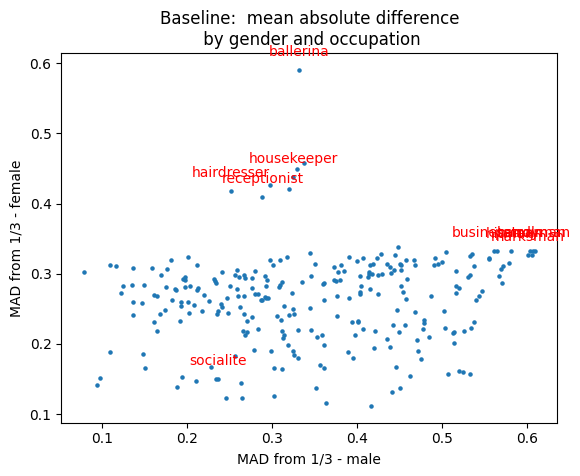

Baseline:  
Top 10 female entailed occupations: ('handyman', 'patrolman', 'businessman', 'marksman', 'hitman')

Top 10 male entailed occupations: ('ballerina', 'hairdresser', 'housekeeper', 'socialite', 'receptionist')


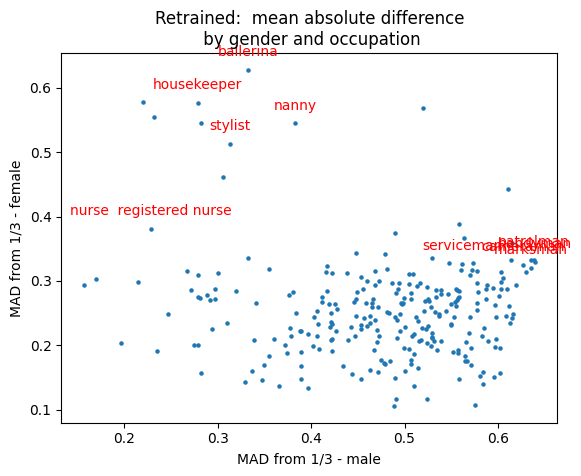

Retrained:  
Top 10 female entailed occupations: ('ballerina', 'nanny', 'stylist', 'housekeeper', 'nurse  registered nurse')

Top 10 male entailed occupations: ('cameraman', 'handyman', 'serviceman', 'patrolman', 'marksman')


In [28]:
m_values, f_values, keys, b_sorted_mean_m, b_sorted_mean_f, baseline, m_mad_vals, f_mad_vals = process_occ_entail('/content/baseline_prob_diff')
plot_occupation_bias(m_mad_vals, f_mad_vals, keys, sorted_mean_m, sorted_mean_f, 'Baseline: ', True)

m_values, f_values, keys, sorted_mean_f, sorted_mean_m, baseline, m_mad_vals, f_mad_vals = process_occ_entail('/content/trained_prob_diff')
plot_occupation_bias(m_mad_vals, f_mad_vals, keys, b_sorted_mean_m, b_sorted_mean_f, 'Retrained: ', True)

### Delta mean absolute difference from baseline to retrain (how much they moved) and which are biggest movers

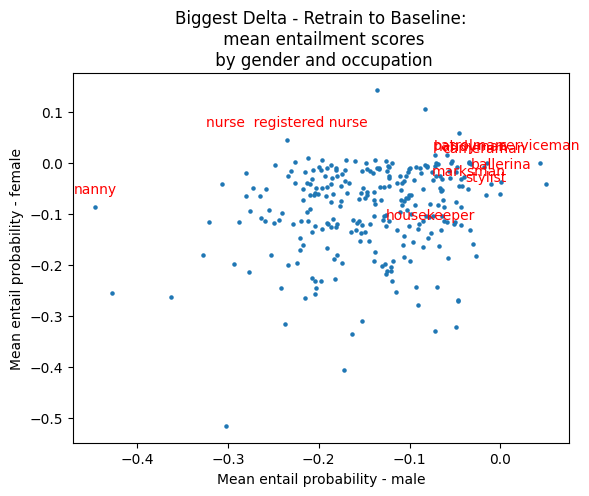

Biggest Delta - Retrain to Baseline:
 
Top 10 female entailed occupations: ('ballerina', 'nanny', 'stylist', 'housekeeper', 'nurse  registered nurse')

Top 10 male entailed occupations: ('cameraman', 'handyman', 'serviceman', 'patrolman', 'marksman')


In [46]:
delta_m = np.array(b_m_values) - np.array(m_values)
delta_f = np.array(b_f_values) - np.array(f_values)
plot_occupation_bias(delta_m, delta_f, keys, b_sorted_mean_m, b_sorted_mean_f, 'Biggest Delta - Retrain to Baseline:\n')

In [66]:
sorted_idx = np.argsort(delta_m)
sorted_arr = delta_m[sorted_idx]
biggest_movers_m = [list(keys)[i] for i in sorted_idx][0:10]
# Biggest movers in occupations from baseline to train - male
biggest_movers_m

['nanny',
 'librarian',
 'teacher',
 'therapist',
 'scholar',
 'filmmaker',
 'socialite',
 'psychologist',
 'assistant professor  professor',
 'analyst']

In [65]:
sorted_idx = np.argsort(delta_f)
sorted_arr = delta_m[sorted_idx]
biggest_movers_f = [list(keys)[i] for i in sorted_idx][0:10]
# Biggest movers in occupations from baseline to train - female
biggest_movers_f

['socialite',
 'artist  artiste',
 'pediatrician',
 'chancellor',
 'dean',
 'medic',
 'aide',
 'director',
 'bishop',
 'journalist  photojournalist']

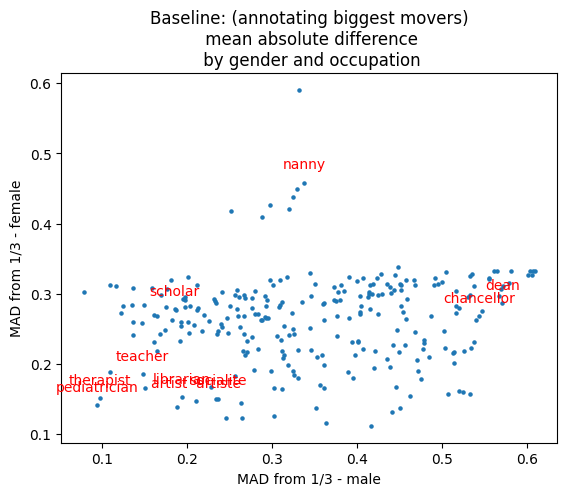

Baseline: (annotating biggest movers)
 
Top 10 female entailed occupations: ['socialite', 'artist  artiste', 'pediatrician', 'chancellor', 'dean']

Top 10 male entailed occupations: ['nanny', 'librarian', 'teacher', 'therapist', 'scholar']


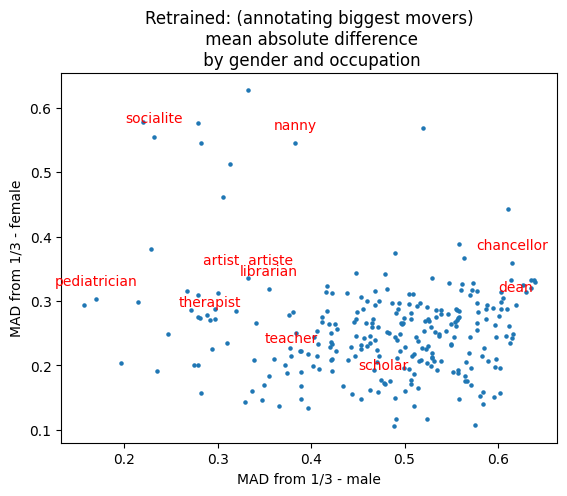

Retrained: (annotating biggest movers)
 
Top 10 female entailed occupations: ['socialite', 'artist  artiste', 'pediatrician', 'chancellor', 'dean']

Top 10 male entailed occupations: ['nanny', 'librarian', 'teacher', 'therapist', 'scholar']


In [71]:
# Annotate original MAD plots w/ biggest movers
m_values, f_values, keys, b_sorted_mean_m, b_sorted_mean_f, baseline, m_mad_vals, f_mad_vals = process_occ_entail('/content/baseline_prob_diff')
plot_occupation_bias(m_mad_vals, f_mad_vals, keys, biggest_movers_m, biggest_movers_f, 'Baseline: (annotating biggest movers)\n', True)

m_values, f_values, keys, sorted_mean_f, sorted_mean_m, baseline, m_mad_vals, f_mad_vals = process_occ_entail('/content/trained_prob_diff')
plot_occupation_bias(m_mad_vals, f_mad_vals, keys, biggest_movers_m, biggest_movers_f, 'Retrained: (annotating biggest movers)\n', True)